In [1]:
import numpy as np
from matplotlib import pyplot as plt

import fretbursts as frb
import burstH2MM as bhm

sns = frb.init_notebook()

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.7.1).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


In [2]:
filename = 'HP3_TE300_SPC630.hdf5'
# load the data into the data object frbdata
frbdata = frb.loader.photon_hdf5(filename)

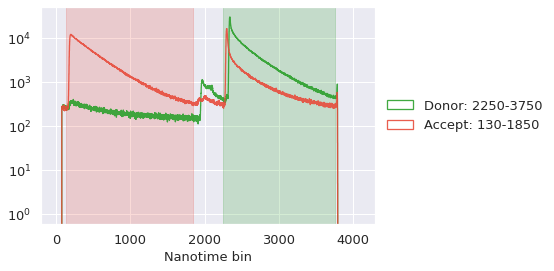

In [3]:
# plot the alternation histogram
frb.bpl.plot_alternation_hist(frbdata)

In [4]:
# if the alternation period is correct, apply data
frb.loader.alex_apply_period(frbdata)

# Total photons (after ALEX selection):    11,414,157
#  D  photons in D+A excitation periods:    5,208,392
#  A  photons in D+A excitation periods:    6,205,765
# D+A photons in  D  excitation period:     6,611,308
# D+A photons in  A  excitation period:     4,802,849



 - Calculating BG rates ... get bg th arrays
Channel 0
[DONE]


<AxesSubplot:title={'center':'HP3_TE300_SPC630'}, xlabel='Inter-photon delays (ms)', ylabel='# Delays'>

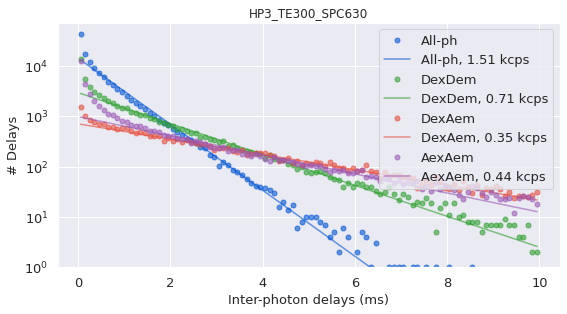

In [5]:
# calcualte the background rate
frbdata.calc_bg(frb.bg.exp_fit, F_bg=1.7)
# plot bg parameters, to verify quality
frb.dplot(frbdata, frb.hist_bg)

 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]
<class 'matplotlib.figure.Figure'>


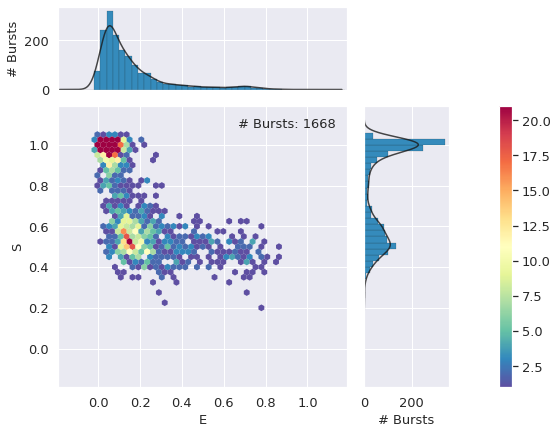

In [6]:
# now perform burst search
frbdata.burst_search(m=10, F=6)
# make sure to set the appropriate thresholds of ALL size
# parameters to the particulars of your experiment
frbdata_sel = frbdata.select_bursts(frb.select_bursts.size, th1=50)

frb.alex_jointplot(frbdata_sel);

In [7]:
bdata = bhm.BurstData(frbdata_sel)

In [8]:
# calculate models
bdata.models.calc_models()

The model converged after 2 iterations

The model converged after 35 iterations

The model converged after 122 iterations

The model converged after 404 iterations

2

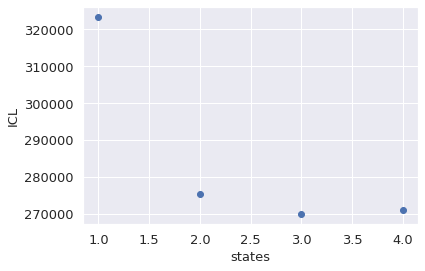

In [9]:
bhm.ICL_plot(bdata.models);

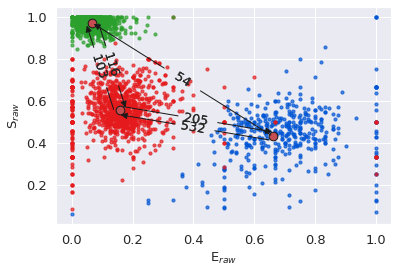

In [10]:
# plot the dwell ES of the result
bhm.dwell_ES_scatter(bdata.models[2])
# overlay with the main values,
bhm.scatter_ES(bdata.models[2], s=75, c="r", ec='k')
# plot arrows and transition rates
bhm.trans_arrow_ES(bdata.models[2]);

In [11]:
bdata.models[2].E, bdata.models[2].S

(array([0.66031034, 0.15955158, 0.06730048]),
 array([0.43073408, 0.55348988, 0.9708039 ]))

In [12]:
bdata.models[2].trans

array([[1.99994147e+07, 5.31727384e+02, 5.35449335e+01],
       [2.05278796e+02, 1.99996914e+07, 1.03279314e+02],
       [7.90906719e+00, 1.16271242e+02, 1.99998758e+07]])

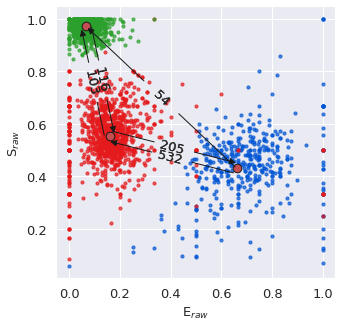

In [13]:
fig, ax = plt.subplots(figsize=(5,5))

# plot the dwell ES of the result
bhm.dwell_ES_scatter(bdata.models[2])
# overlay with the main values,
bhm.scatter_ES(bdata.models[2], s=75, c="r", ec='k')
# plot arrows and transition rates
bhm.trans_arrow_ES(bdata.models[2]);

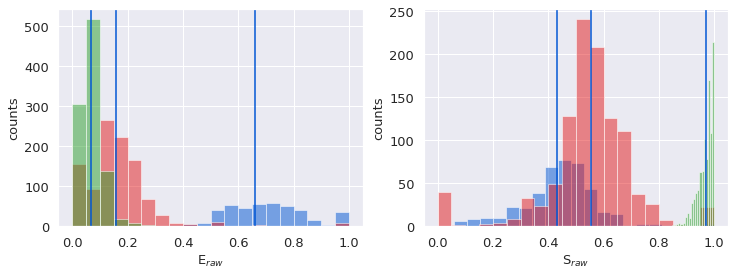

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))

# plot E histogram in 1st subplot
bhm.dwell_E_hist(bdata.models[2], ax=ax[0])
bhm.axline_E(bdata.models[2], ax=ax[0])

# plot S histogram in 2nd subplot
bhm.dwell_S_hist(bdata.models[2], ax=ax[1])
bhm.axline_S(bdata.models[2], ax=ax[1]);

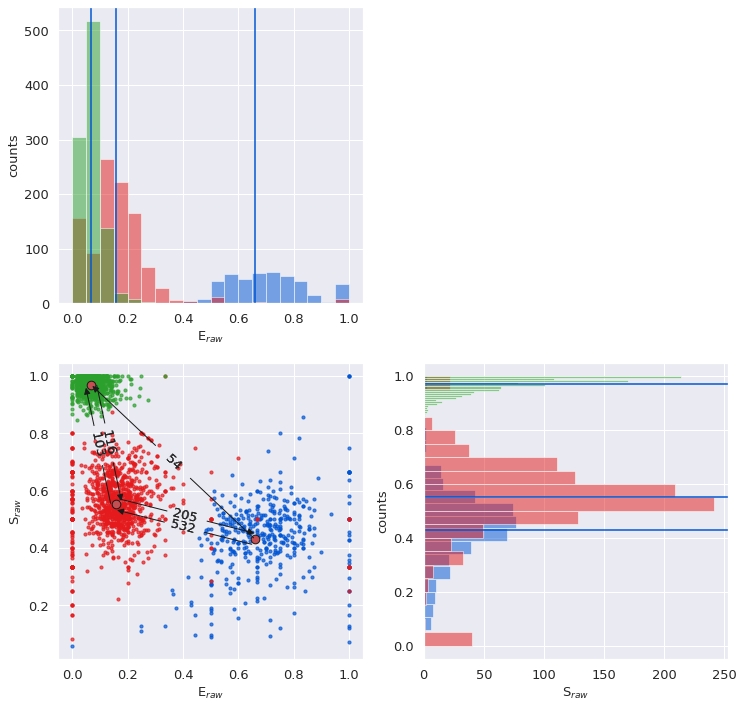

In [15]:
# make plot with 2 rows and 2 columns
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

# plot the dwell ES of the result
bhm.dwell_ES_scatter(bdata.models[2], ax=ax[1,0])
# overlay with the main values,
bhm.scatter_ES(bdata.models[2], s=75, c="r", ec='k', ax=ax[1,0])
# plot arrows and transition rates
bhm.trans_arrow_ES(bdata.models[2], ax=ax[1,0])


# plot E histogram in 1st subplot
bhm.dwell_E_hist(bdata.models[2], ax=ax[0,0]) # ax[0,0] so place in upper left corner
bhm.axline_E(bdata.models[2], ax=ax[0,0])

# plot S histogram in 2nd subplot
bhm.dwell_S_hist(bdata.models[2], ax=ax[1,1], orientation='horizontal') # ax[1,1] so place in upper left corner
bhm.axline_S(bdata.models[2], ax=ax[1,1], horizontal=True);
# silence the unused axis
ax[0,1].axis('off');

In [16]:
bdata.models[2].loglik_err.get_E_err(1)

0.001923828124999985

In [17]:
bdata.models[2].loglik_err.get_trans_err(0,1)

masked_array(data=[501.8586074655524, 562.3569445639647],
             mask=[False, False],
       fill_value=inf)

In [18]:
bdata.models[2].bootstrap_eval()

The model converged after 1987 iterations

The model converged after 405 iterations

The model converged after 193 iterations

The model converged after 231 iterations

The model converged after 203 iterations

The model converged after 260 iterations

The model converged after 306 iterations

The model converged after 407 iterations

The model converged after 282 iterations

The model converged after 224 iterations

(array([[109.28690798, 108.97205588,  70.31510773],
        [ 47.38608221,  64.09946195,  33.97985691],
        [ 16.00785918,  33.65214868,  34.29002879]]),
 array([0.03168643, 0.00606686, 0.00233699]),
 array([0.02549997, 0.0118141 , 0.00361265]))

In [19]:
bdata.models[2].E_std_bs, bdata.models[2].S_std_bs

(array([0.03168643, 0.00606686, 0.00233699]),
 array([0.02549997, 0.0118141 , 0.00361265]))

In [20]:
bdata.models[2].trans_std_bs

array([[109.28690798, 108.97205588,  70.31510773],
       [ 47.38608221,  64.09946195,  33.97985691],
       [ 16.00785918,  33.65214868,  34.29002879]])

([[<matplotlib.lines.Line2D at 0x7f7a74be9ca0>],
 <matplotlib.legend.Legend at 0x7f7a74be93d0>)

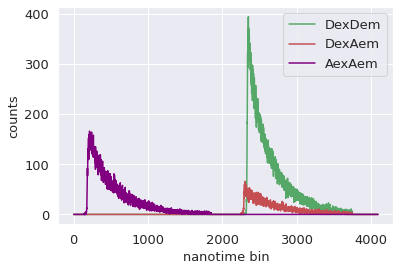

In [21]:
bhm.raw_nanotime_hist(bdata)

In [22]:
bdata.irf_thresh = np.array([2355, 2305, 220])

In [23]:
div_name = bdata.auto_div(1)

In [24]:
# run H2MM analysis
bdata.div_models[div_name].calc_models()

The model converged after 2 iterations

The model converged after 28 iterations

The model converged after 78 iterations

The model converged after 397 iterations

2

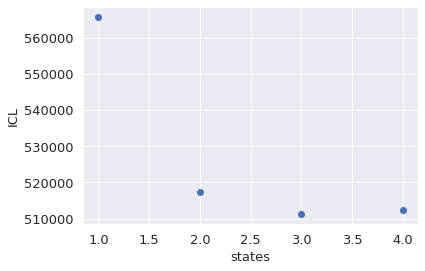

In [25]:
bhm.ICL_plot(bdata.div_models[div_name])

[[<BarContainer object of 10 artists>],
 [<BarContainer object of 10 artists>],
 [<BarContainer object of 10 artists>]]

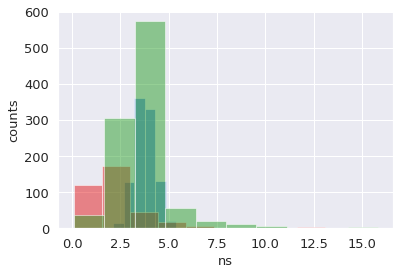

In [26]:
bhm.dwell_tau_hist(bdata.div_models[div_name][2])